# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


#### Observations
Locations closer to the equater experience higher temperatures. Temperature seems to have a strong correlation with latitude.

Clousiness and wind speed do not show a strong correlation to latitude. Although, wind speed does appear to  increase slightly in cities further from the equator. 

Humidity do not show a strong correlation to latitude, however, there are mor cities in the Northern Hemisphere with humitity over 80% than the Southern Hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import weather_api_key
from scipy.stats import linregress
from sklearn import datasets
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [2]:
lat_long = []
cities = []
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lat, long)
for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create base URL for open weather map API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_name = []
clouds = []
country = []
dates = []
humidity = []
lat = []
lng = []
max_temp = []
wind = []

counter = 1

print('-'*30)
print("Running Data Retrieval")
print('-'*30)

# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        city_name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        
        print(f'Searching for record {counter} | {city}')
        
        # Increase record counter.
        counter += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('city weather not found, skipping to next record')
    continue

------------------------------
Running Data Retrieval
------------------------------
Searching for record 1 | najran
Searching for record 2 | atuona
Searching for record 3 | punta arenas
Searching for record 4 | fare
Searching for record 5 | bluff
Searching for record 6 | pevek
Searching for record 7 | dikson
city weather not found, skipping to next record
Searching for record 8 | natal
Searching for record 9 | cabedelo
Searching for record 10 | lompoc
Searching for record 11 | kihei
Searching for record 12 | busselton
Searching for record 13 | bredasdorp
Searching for record 14 | mataura
Searching for record 15 | vaini
Searching for record 16 | saskylakh
Searching for record 17 | ingham
Searching for record 18 | ushuaia
city weather not found, skipping to next record
Searching for record 19 | sorong
Searching for record 20 | tocopilla
Searching for record 21 | puerto escondido
Searching for record 22 | geraldton
Searching for record 23 | carnarvon
city weather not found, skipping to n

Searching for record 196 | cathedral city
Searching for record 197 | naica
Searching for record 198 | kavaratti
Searching for record 199 | cochrane
Searching for record 200 | hervey bay
Searching for record 201 | binga
Searching for record 202 | kulhudhuffushi
Searching for record 203 | sambava
Searching for record 204 | bambous virieux
Searching for record 205 | broome
Searching for record 206 | wageningen
Searching for record 207 | new waterford
Searching for record 208 | caxito
Searching for record 209 | ketchikan
Searching for record 210 | makubetsu
Searching for record 211 | leh
Searching for record 212 | maragogi
Searching for record 213 | beyneu
Searching for record 214 | athabasca
Searching for record 215 | kahului
Searching for record 216 | loknya
Searching for record 217 | tual
Searching for record 218 | muriwai beach
Searching for record 219 | hasaki
Searching for record 220 | dunedin
Searching for record 221 | sydney mines
Searching for record 222 | mandera
Searching for re

Searching for record 404 | collie
Searching for record 405 | shache
Searching for record 406 | angoram
Searching for record 407 | corato
Searching for record 408 | sur
Searching for record 409 | gornopravdinsk
Searching for record 410 | skibbereen
Searching for record 411 | roma
Searching for record 412 | acajutla
Searching for record 413 | pekan
Searching for record 414 | prince rupert
Searching for record 415 | otuzco
Searching for record 416 | thiers
Searching for record 417 | yaounde
Searching for record 418 | daru
Searching for record 419 | kurumkan
Searching for record 420 | camabatela
Searching for record 421 | tiznit
Searching for record 422 | salinopolis
Searching for record 423 | kijang
Searching for record 424 | kokopo
Searching for record 425 | malartic
Searching for record 426 | areosa
city weather not found, skipping to next record
Searching for record 427 | iqaluit
Searching for record 428 | hualmay
Searching for record 429 | maiduguri
Searching for record 430 | zhanaoze

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = {'City' : city_name,
              'Country' : country,
              'Date' : dates,
              'Cloud Cover': clouds,
              'Humidity' : humidity,
              'Maximum Temperature' : max_temp,
              'Wind Speed' : wind,
              'Latitude' : lat,
              'Longitude' : lng}
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Country,Date,Cloud Cover,Humidity,Maximum Temperature,Wind Speed,Latitude,Longitude
0,Najrān,SA,1603115967,0,17,78.06,11.90,17.49,44.13
1,Atuona,PF,1603115622,11,74,78.10,20.33,-9.80,-139.03
2,Punta Arenas,CL,1603115582,87,64,42.89,25.17,-53.15,-70.92
3,Fare,PF,1603115683,0,78,80.02,14.65,-16.70,-151.02
4,Bluff,NZ,1603115577,97,88,48.00,11.01,-46.60,168.33


In [5]:
weather_df.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
high_humidity = weather_df.loc[weather_df['Humidity'] > 100]
high_humidity

,City,Country,Date,Cloud Cover,Humidity,Maximum Temperature,Wind Speed,Latitude,Longitude


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

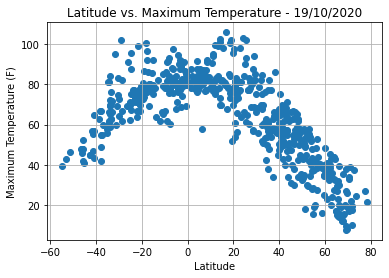

In [7]:
plt.scatter(weather_data['Latitude'], weather_data['Maximum Temperature'], marker='o')
plt.title('Latitude vs. Maximum Temperature - 19/10/2020')
plt.ylabel('Maximum Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('WeatherPy_Images/Temperature_vs_Lat.png')

## Latitude vs. Humidity Plot

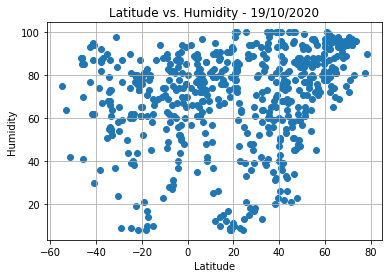

In [8]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity'], marker='o')
plt.title('Latitude vs. Humidity - 19/10/2020')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('WeatherPy_Images/Humidity_vs_Lat.png')

## Latitude vs. Cloudiness Plot

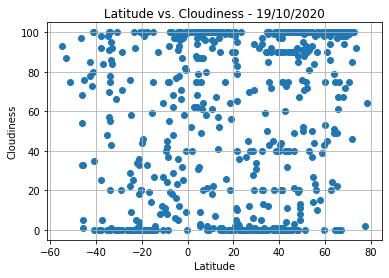

In [9]:
plt.scatter(weather_data['Latitude'], weather_data['Cloud Cover'], marker='o')
plt.title('Latitude vs. Cloudiness - 19/10/2020')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('WeatherPy_Images/Cloudiness_vs_Lat.png')

## Latitude vs. Wind Speed Plot

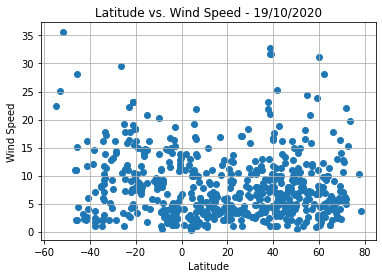

In [10]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'], marker='o')
plt.title('Latitude vs. Wind Speed - 19/10/2020')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('WeatherPy_Images/Wind_vs_Lat.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [11]:
northern_hemisphere = weather_df.loc[weather_df['Latitude'] > 0]
southern_hemisphere = weather_df.loc[weather_df['Latitude'] < 0]

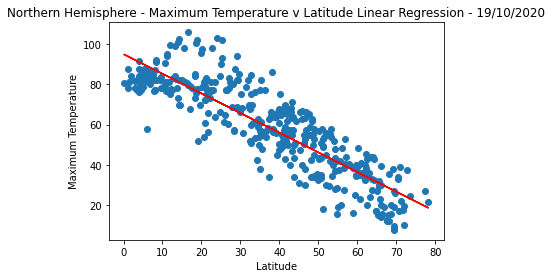

In [12]:
x_values = northern_hemisphere.iloc[:,7]
y_values = northern_hemisphere.iloc[:,5]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,fit,"r-")
plt.title('Northern Hemisphere - Maximum Temperature v Latitude Linear Regression - 19/10/2020')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig('WeatherPy_Images/North_Hem_Temperature_vs_Lat_LR.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

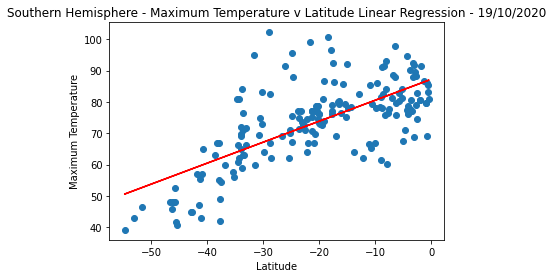

In [13]:
x_values = southern_hemisphere.iloc[:,7]
y_values = southern_hemisphere.iloc[:,5]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,fit,"r-")
plt.title('Southern Hemisphere - Maximum Temperature v Latitude Linear Regression - 19/10/2020')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig('WeatherPy_Images/South_Hem_Temperature_vs_Lat_LR.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

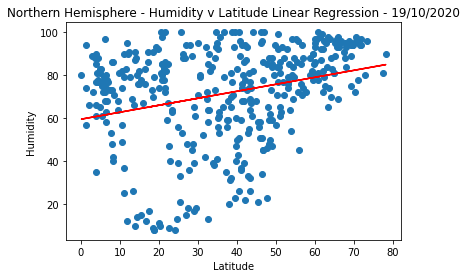

In [14]:
x_values = northern_hemisphere.iloc[:,7]
y_values = northern_hemisphere.iloc[:,4]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,fit,"r-")
plt.title('Northern Hemisphere - Humidity v Latitude Linear Regression - 19/10/2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('WeatherPy_Images/North_Hem_Humidity_vs_Lat_LR.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

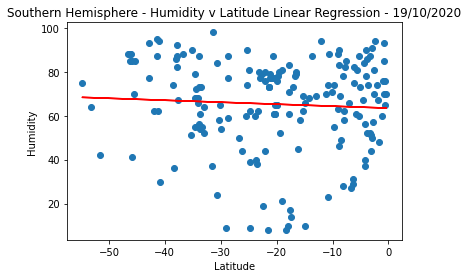

In [15]:
x_values = southern_hemisphere.iloc[:,7]
y_values = southern_hemisphere.iloc[:,4]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,fit,"r-")
plt.title('Southern Hemisphere - Humidity v Latitude Linear Regression - 19/10/2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('WeatherPy_Images/South_Hem_Humidity_vs_Lat_LR.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

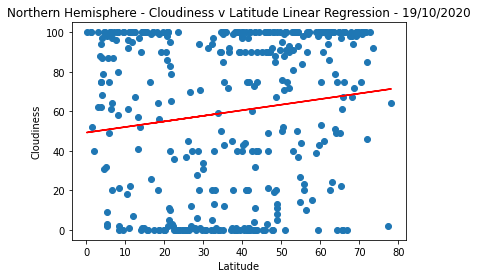

In [16]:
x_values = northern_hemisphere.iloc[:,7]
y_values = northern_hemisphere.iloc[:,3]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,fit,"r-")
plt.title('Northern Hemisphere - Cloudiness v Latitude Linear Regression - 19/10/2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('WeatherPy_Images/North_Hem_Cloudiness_vs_Lat_LR.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

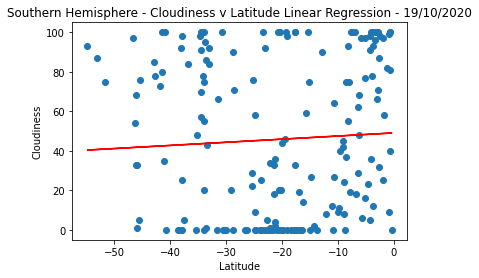

In [17]:
x_values = southern_hemisphere.iloc[:,7]
y_values = southern_hemisphere.iloc[:,3]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,fit,"r-")
plt.title('Southern Hemisphere - Cloudiness v Latitude Linear Regression - 19/10/2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('WeatherPy_Images/South_Hem_Cloudiness_vs_Lat_LR.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

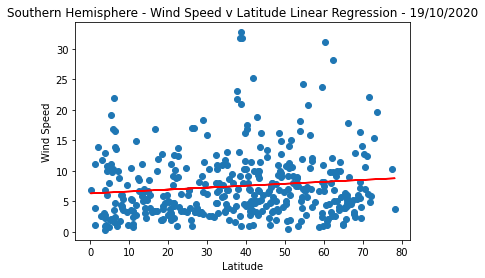

In [18]:
x_values = northern_hemisphere.iloc[:,7]
y_values = northern_hemisphere.iloc[:,6]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,fit,"r-")
plt.title('Southern Hemisphere - Wind Speed v Latitude Linear Regression - 19/10/2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('WeatherPy_Images/North_Hem_Wind_vs_Lat_LR.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

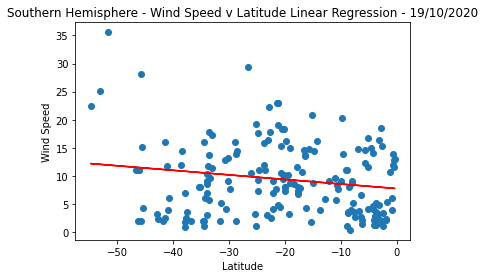

In [19]:
x_values = southern_hemisphere.iloc[:,7]
y_values = southern_hemisphere.iloc[:,6]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,fit,"r-")
plt.title('Southern Hemisphere - Wind Speed v Latitude Linear Regression - 19/10/2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('WeatherPy_Images/South_Hem_Wind_vs_Lat_LR.png')
plt.show()